# Phase 4 Code Challenge Review

Made using resources that Max put together, thanks Max!

## Overview

- Principal Component Analysis
- Clustering
- Time Series
- Natural Language Processing

In [1]:
# Basic Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from src.call import call_on_students

ModuleNotFoundError: No module named 'src'

# 1) Principal Component Analysis

![pca gif saved from learnco](images/pca.gif)

## PCA Concepts

### 1: What does PCA do? 

Specifically, describe what the first principal component represents in relation to the original data.

In [3]:
# call_on_students(1)

#### Answer: 

- reducing dimensionality whilst accounting for variance of the original data
- uses linear algebra and eigenvevtors to identify principal components


### 2: What are some reasons to use PCA?

In [4]:
# call_on_students(1)

#### Answer: 

- many features, large datasets
- can address multicollinearity
- reduces (complexity) to 2 or 3 components for more interpretable visualizations

### 3: Why is scaling important for PCA?

In [5]:
# call_on_students(1)

#### Answer: 

- use of linear algebra requires data to have linear relationships to one another
- scaling is important because it's maximizing variance and if normalization isn't dont, it will greatly reduce usability


### 4: How can one determine how many principle components to use in a model?

In [6]:
# call_on_students(1)

#### Answer: 
- depends on how you're trying to use it: 
- if using PCA to visualize 2-3 components, that's how many you want
- choose amount of variance you want explained


## PCA in Code

### Set Up

In [7]:
from sklearn.datasets import  load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### 5: Prepare our Data for PCA

What steps do we need to take to preprocess our data effectively?

- 


In [8]:
# call_on_students(1)

In [9]:
# Code to preprocess X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

### 6: Import PCA, Then Instantiate and Fit a PCA Object

In [10]:
# call_on_students(1)

In [11]:
# Code to import, instantiate and fit a PCA object
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

pca.fit(X_scaled)

PCA(n_components=5)

### 7: How Much Variance is Explained by the First 2 Components?

In [12]:
# call_on_students(1)

In [13]:
# Code here to answer the question

pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]

0.6324320765155941

#### Answer:

- 


# 2) Clustering

## Clustering Concepts

### 8: Describe how the K-Means algorithm updates its cluster centers after initialization.

In [14]:
# call_on_students(1)

#### Answer:

- You set the number of cluster centers (K) - algorithm randomly starts with that number of cluster centers (in random spots!)
- The algorithm calculates the distance between the centers and each observation and assigns the observation to the closest cluster center to create the first iteration of clusters
- The algorithm then takes all the observations assigned to each cluster, and moves that cluster center to be at the exact actual center (mean) of the newly created cluster
- Repeat! Until the cluster centers stop moving (or tolerance is met - some parameters in the implementation)


### 9: What is inertia, and how does K-Means use inertia to determine the best estimator?

Please also describe the method you can use to evaluate clustering using inertia.

Documentation, for reference: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [15]:
# call_on_students(1)

#### Answer:

- error metric
- inertia measure the distance between each point and its center - the idea is that better clusters are more tightly concentrated
- kmeans tries to minimize inertia when choosing cluster centers
- method to evaluate - elbow plot.


### 10: What other metric do we have to score the clusters which are formed?

Describe the difference between it and inertia.

In [16]:
# call_on_students(1)

#### Answer:

- silhouette score & inertia
- silhouette score tries to maximize similarity within groups and maximize distance between clusters
- inertia just looks within each cluster


## Clustering in Code with Heirarchical Agglomerative Clustering

After the above conceptual review of KMeans, let's practice coding with agglomerative clustering.


### Set Up

In [17]:
# New dataset for this section!
from sklearn.datasets import load_iris

data = load_iris()
X = pd.DataFrame(data['data'])

### 11: Prepare our Data for Clustering

What steps do we need to take to preprocess our data effectively?

- 


In [18]:
# call_on_students(1)

In [19]:
# Code to preprocess the data
# Name the processed data X_processed
k_scaler = StandardScaler()

X_processed = k_scaler.fit_transform(X)

### 12: Import the Relevant Class, Then Instantiate and Fit a Hierarchical Agglomerative Clustering Object

Let's use `n_clusters = 2` to start (default)

In [20]:
# call_on_students(1)

In [21]:
# Import the relevent clustering algorithm
from sklearn.cluster import AgglomerativeClustering

In [22]:
#instantiate the object
cluster = AgglomerativeClustering(n_clusters=2)
# Fit the object
cluster.fit(X_processed)

AgglomerativeClustering()

In [23]:
# Calculate a silhouette score
from sklearn.metrics import silhouette_score

In [24]:
silhouette_score(X_processed, cluster.labels_)

0.5770346019475989

### 13: Write a Function to Test Different Options for `n_clusters`

The function should take in the number for `n_clusters` and the data to cluster, fit a new clustering model using that parameter to the data, print the silhouette score, then return the labels attribute from the fit clustering model.

In [25]:
# call_on_students(1)

In [26]:
def test_n_for_clustering(n, data):
    """ 
    Tests different numbers for the hyperparameter n_clusters
    Prints the silhouette score for that clustering model
    Returns the labels that are output from the clustering model

    Parameters: 
    -----------
    n: float object
        number of clusters to use in the agglomerative clustering model
    data: Pandas DataFrame or array-like object
        Data to cluster

    Returns: 
    --------
    labels: array-like object
        Labels attribute from the clustering model
    """
    cluster = AgglomerativeClustering(n_clusters=n)
    # Fit the new clustering model
    cluster.fit(data)
    # Print the silhouette score
    print(silhouette_score(data, cluster.labels_))
    # Return the labels attribute from the fit clustering model
    return cluster.labels_

In [27]:
# Testing your function

for n in range(2, 9):
    test_n_for_clustering(n, X_processed)

0.5770346019475989
0.446689041028591
0.4006363159855973
0.33058726295230545
0.3148548010051283
0.316969830299128
0.310946529007258


# 3) Time Series

In [28]:
# New dataset for this section!
ap = pd.read_csv('data/AirPassengers.csv')
ap.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### 14: Prepare our Data for Time Series Analysis

What steps do we need to take to preprocess our data effectively?

- format as datetime
- datetime as index
- 


In [29]:
# call_on_students(1)

In [30]:
# Code here 
ap.Month = pd.to_datetime(ap['Month'])
ap = ap.set_index('Month')
ap.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### 15: Explore Patterns in the Data

In [ ]:
# call_on_students(1)

First: what kinds of patterns can one find in time series data?

- seasonality
- trends
- cyclical
- upward/downward mean


Second, plot this time series data. What kinds of patterns do you see in this dataset?

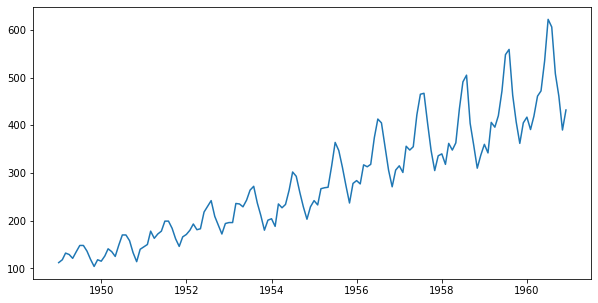

In [31]:
# Code to plot the time series
fig = plt.figure(figsize=(10,5))
plt.plot(ap)

### 16: Explore the Moving Average

What window would make sense to use for this data?

- seasonality
- upward mean
- increasing variance or amplitude


In [ ]:
# call_on_students(1)

In [32]:
# Code to create the moving average
sma = ap.rolling(window=12).mean()
sma

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,463.333333
1960-09-01,467.083333
1960-10-01,471.583333


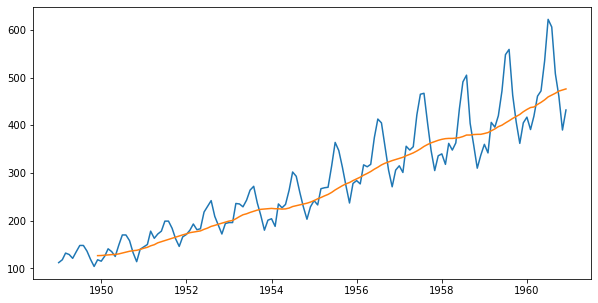

In [35]:
# Add to the moving average to the above plot
# Code to plot the time series
fig = plt.figure(figsize=(10,5))
plt.plot(ap)
plt.plot(sma)

### 17: Explore Stationarity


In [ ]:
# call_on_students(1)

Why do we try to make our data stationary?

- get rid of the noise in the data
- model performs better on stationary data because it helps the model focus on the part that actually needs predicting


What can we do to make our data stationary?

- differencing
- moving average
- transformations


### 18: Check Stationarity

In [ ]:
# call_on_students(1)

In [37]:
# Code here to check if the data is stationary
from statsmodels.tsa.stattools import adfuller
adfuller(ap)

(0.8153688792060442,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [38]:
adfuller(ap)[1]

0.9918802434376409

Is the data stationary?
- no because the dicky fuller test value is greater than or equal to 0.05 (standard alpha)

### 19: Try to Make the Data Stationarity

Implement one strategy to try to make the data more stationary, then check if it worked.

In [ ]:
# call_on_students(1)

In [39]:
# Code here to try to make the data stationary
diff_ap = ap.diff().dropna()

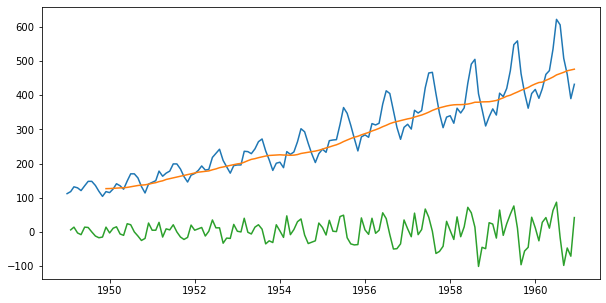

In [40]:
fig = plt.figure(figsize=(10,5))
plt.plot(ap)
plt.plot(sma)
plt.plot(diff_ap)

In [ ]:
# Code here to check if the data is stationary

In [41]:
adfuller(diff_ap)[1]

0.05421329028382621

<a id='clust'></a>

# 4) Natural Language Processing

## NLP Concepts

### Some Example Text

In [42]:
# Each sentence is a document
sentence_one = "Harry Potter is the best young adult book about wizards"
sentence_two = "Um, EXCUSE ME! Ever heard of Earth Sea?"
sentence_three = "I only like to read non-fiction.  It makes me a better person."

# The corpus is composed of all of the documents
corpus = [sentence_one, sentence_two, sentence_three]

### 20: NLP Pre-processing

List at least three steps you can take to turn raw text like this into something that would be semantically valuable (aka ready to turn into numbers):

In [ ]:
# call_on_students(1)

#### Answer:

1. Lowercase/remove punctuation
2. Tokenize
3. Remove Stopwards
4. Lemmatize or Stemmazie

### 21: Describe what vectorized text would look like as a dataframe.

If you vectorize the above corpus, what would the rows and columns be in the resulting dataframe (aka document term matrix)

In [ ]:
# call_on_students(1)

#### Answer:

- columns: filter tokens in the corpus
- rows: documents that are being vectorized


### 22: What does TF-IDF do?

Also, what does TF-IDF stand for?

In [ ]:
# call_on_students(1)

#### Answer:

- vectorizes documents takes into acount the rarity of the words(with a pattern)

- Term Frequency
- Inverse Document Frequency


## NLP in Code

### Set Up

In [43]:
# New section, new data
policies = pd.read_csv('data/2020_policies_feb_24.csv')

def warren_not_warren(label):
    
    '''Make label a binary between Elizabeth Warren
    speeches and speeches from all other candidates'''
    
    if label =='warren':
        return 1
    else:
        return 0
    
policies['candidate'] = policies['candidate'].apply(warren_not_warren)

The dataframe loaded above consists of policies of 2020 Democratic presidential hopefuls. The `policy` column holds text describing the policies themselves.  The `candidate` column indicates whether it was or was not an Elizabeth Warren policy.

In [44]:
policies.head()

,Unnamed: 0,name,policy,candidate
0,0,100% Clean Energy for America,"As published on Medium on September 3rd, 2019:...",1
1,1,A Comprehensive Agenda to Boost America’s Smal...,Small businesses are the heart of our economy....,1
2,2,A Fair and Welcoming Immigration System,"As published on Medium on July 11th, 2019:\nIm...",1
3,3,A Fair Workweek for America’s Part-Time Workers,Working families all across the country are ge...,1
4,4,A Great Public School Education for Every Student,I attended public school growing up in Oklahom...,1


The documents for activity are in the `policy` column, and the target is candidate. 

### 23: Import the Relevant Class, Then Instantiate and Fit a Count Vectorizer Object

In [ ]:
# call_on_students(1)

In [45]:
# First! Train-test split the dataset
from sklearn.model_selection import train_test_split

# Code here to train test split
X_train, X_test, y_train, y_test = train_test_split(policies.policy, policies.candidate)

In [46]:
# Import the relevant vectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# Instantiate it
vectorizer = CountVectorizer()

In [48]:
# Fit it
vectorizer.fit(X_train)

CountVectorizer()

### 24: Vectorize Your Text, Then Model

In [ ]:
# call_on_students(1)

In [49]:
# Code here to transform train and test sets with the vectorizer
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [50]:
# Importing the classifier...
from sklearn.ensemble import RandomForestClassifier

# Code here to instantiate and fit a Random Forest model
rfc = RandomForestClassifier()

rfc.fit(X_train_vec, y_train)

RandomForestClassifier()

In [51]:
# Code here to evaluate your model on the test set
rfc.score(X_test_vec, y_test)

0.9375